In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data is loading with pandas

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/ada/bank-additional.csv', sep=';')
data.head(50)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


## Structure of dataset is investigated

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   int64  
 2   marital         4119 non-null   int64  
 3   education       4119 non-null   int64  
 4   default         4119 non-null   int64  
 5   housing         4119 non-null   int64  
 6   loan            4119 non-null   int64  
 7   contact         4119 non-null   int64  
 8   month           4119 non-null   int64  
 9   day_of_week     4119 non-null   int64  
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   int64  
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

## Number of null data for each column is controlled and it was seen that there is no null value.

In [ ]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


## Number of yes and no answers are controlled to understand the balance of dataset. It was seen that the dataset is unbalanced.

In [ ]:
data['y'].value_counts()

,count
y,
no,3668
yes,451


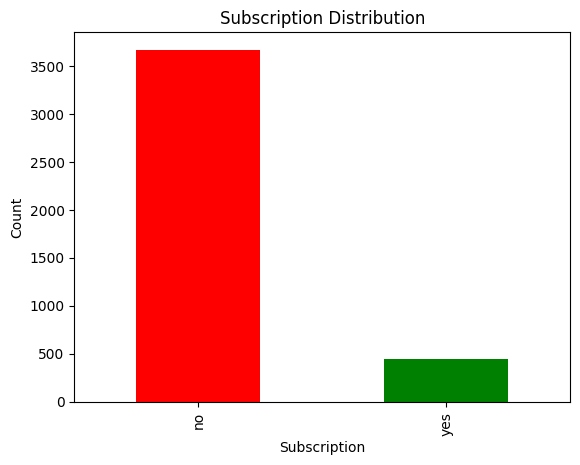

In [ ]:
import matplotlib.pyplot as plt

data['y'].value_counts().plot(kind='bar', title='Subscription Distribution', color=['red', 'green'])
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.show()

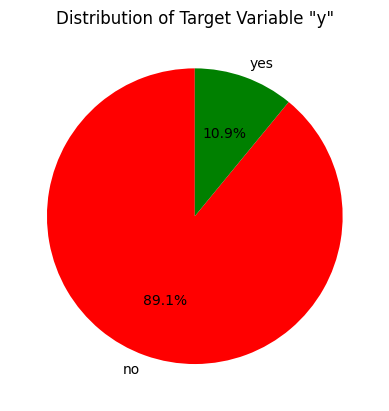

In [ ]:
data['y'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Distribution of Target Variable "y"')
plt.ylabel('')
plt.show()

## Data Preprocessing includes encoding and scaler stages.

### Encoding with Label Encoder

In [ ]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                      'day_of_week', 'poutcome', 'y']
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

for col in categorical_columns:
    data[col] = labelencoder.fit_transform(data[col])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   int64  
 2   marital         4119 non-null   int64  
 3   education       4119 non-null   int64  
 4   default         4119 non-null   int64  
 5   housing         4119 non-null   int64  
 6   loan            4119 non-null   int64  
 7   contact         4119 non-null   int64  
 8   month           4119 non-null   int64  
 9   day_of_week     4119 non-null   int64  
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   int64  
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

# Rebalance :
Unbalanced data is rebalance by using undersampling and oversampling. The resulting dataset ensures a balanced class distribution, which is essential for training models on imbalanced data.

In [ ]:
# The duration column is removed from the dataset, because the duration affected the data column too much, which reduced the accuracy value.
data = data.drop('duration', axis=1)

In [ ]:
# Majority is no answers and minority is yes answers.
major = data[data.y == 0]
minor = data[data.y == 1]

In [ ]:
from sklearn.utils import resample

major_downsampled = resample(major,
                             replace=False,   # Samples without replacement
                             n_samples=len(major), # Match the minority size
                             random_state=42) # Ensures reproducibility

minor_upsampled = resample(minor,
                           replace=True,    # Samples with replacement
                           n_samples=len(major), # Match the majority size
                           random_state=42) # Ensures reproducibility

# Oversampled and Undersampled parts are concated.
balanced_data = pd.concat([major, minor_upsampled])

# New balanced dataset
X = balanced_data.drop('y', axis=1)
y = balanced_data['y']

# Standard Scaler :
To ensure the model performs effectively by scaling the features to the same range. This is especially important for algorithms sensitive to feature magnitudes, such as SVM, KNN, or gradient-based models.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection:
Random Forest calculates the importance of each feature, which can help identify the most significant variables for model performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with a fixed random state for reproducibility
rf = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training dataset
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': X.columns,                # Feature names
    'Importance': rf.feature_importances_  # Importance values computed by Random Forest
}).sort_values(by='Importance', ascending=False)  # Sort features by importance in descending order

feature_importances

,Feature,Importance
17,euribor3m,0.162289
0,age,0.147855
1,job,0.078621
18,nr.employed,0.076782
10,campaign,0.074413
3,education,0.071794
9,day_of_week,0.064022
14,emp.var.rate,0.044085
2,marital,0.039074
16,cons.conf.idx,0.034604


<ipython-input-20-5a5b97379c65>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


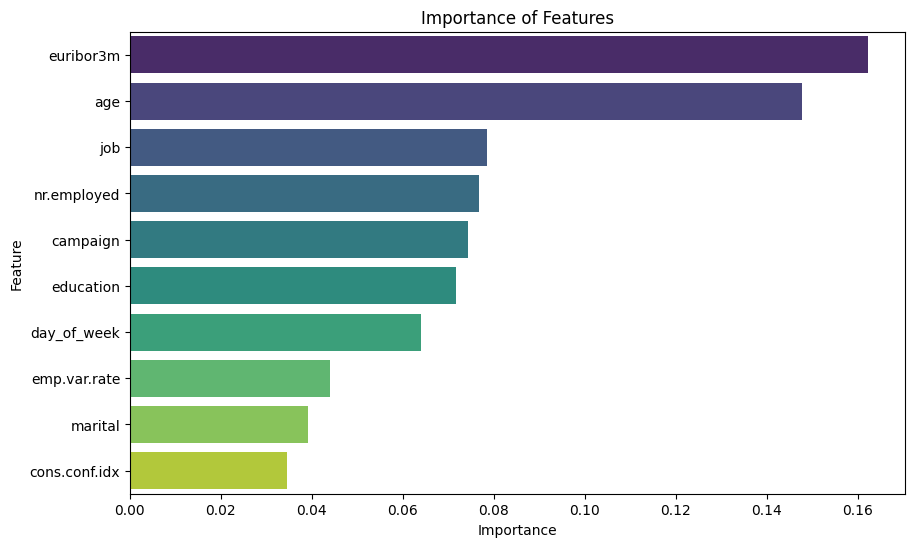

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_features = feature_importances.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Importance of Features')
plt.show()

In [ ]:
important_features = feature_importances[feature_importances['Importance'] > 0.01].index.tolist()
print(important_features)
X_train = X_train[:, important_features]
X_test = X_test[:, important_features]

[17, 0, 1, 18, 10, 3, 9, 14, 2, 16, 5, 15, 11, 13, 8, 7, 6, 4, 12]


# Model Selection: logistic regression, random forest, neural network, gradient boosting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Logistic Regression Model:
The Logistic Regression model, with class_weight='balanced' and max_iter=4000, achieves an accuracy of 71.59%. The F1-scores are 0.75 for class 0 and 0.68 for class 1, showing moderate performance. While precision and recall are relatively balanced, the model struggles to match the performance of Random Forest and Neural Network models, especially in recall for the minority class (1).

In [ ]:
regression_model = LogisticRegression(max_iter=4000, class_weight='balanced')
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7159400544959128
              precision    recall  f1-score   support

           0       0.67      0.84      0.75       735
           1       0.79      0.59      0.68       733

    accuracy                           0.72      1468
   macro avg       0.73      0.72      0.71      1468
weighted avg       0.73      0.72      0.71      1468



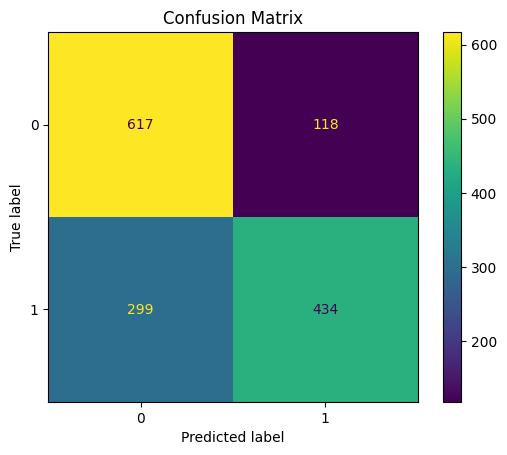

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=regression_model.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

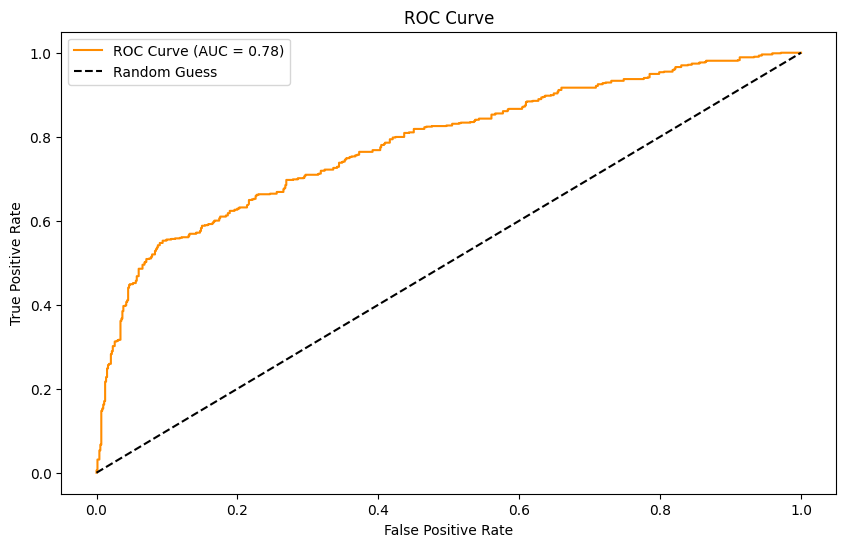

In [ ]:
y_proba = regression_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

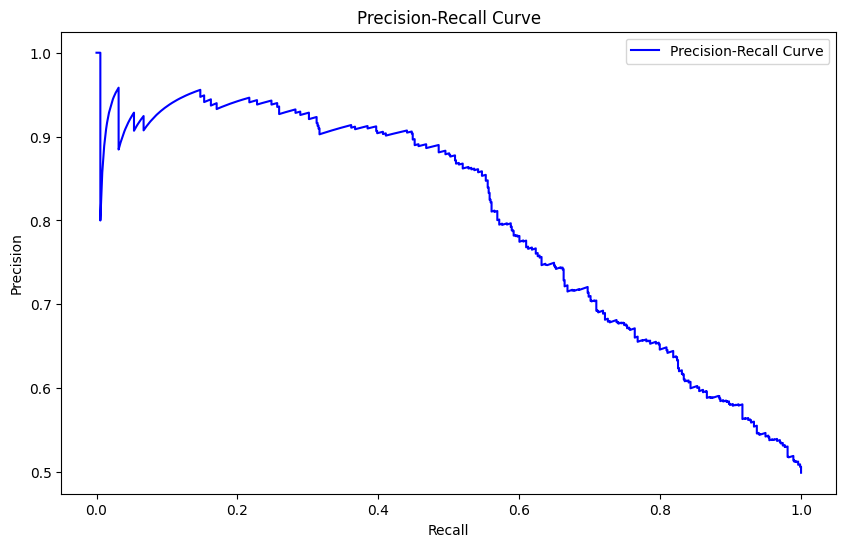

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

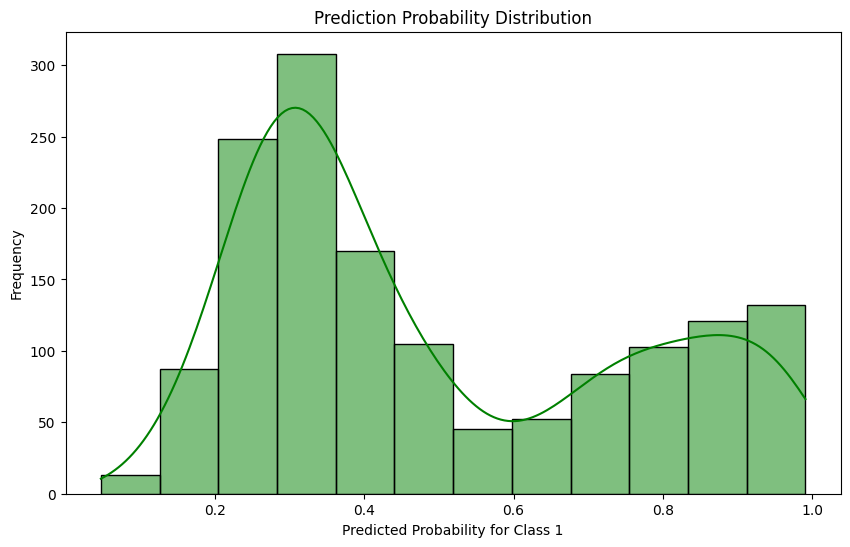

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_proba, kde=True, color='green')
plt.title('Prediction Probability Distribution')
plt.xlabel('Predicted Probability for Class 1')
plt.ylabel('Frequency')
plt.show()

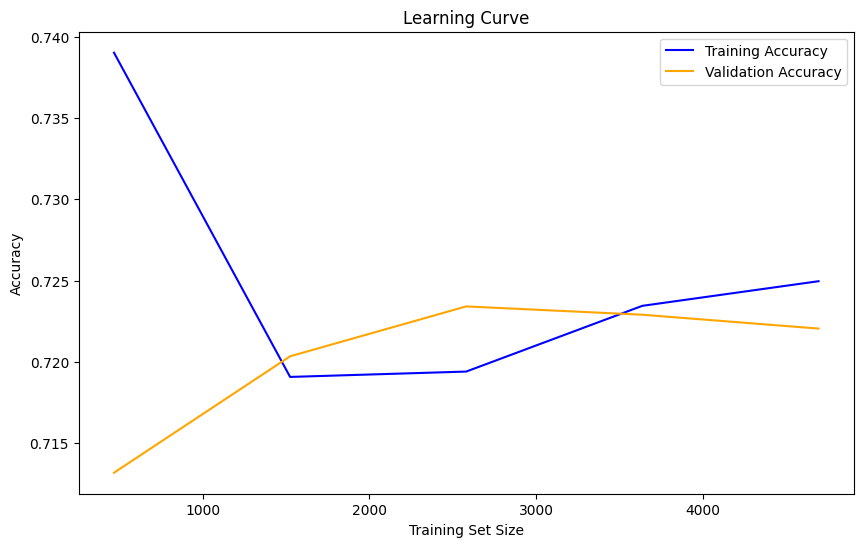

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=regression_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Random Forest Model:
The Random Forest model, with n_estimators=100 and class_weight='balanced', achieves an accuracy of 96.86%. The classification report shows a high F1-score of 0.97 for both classes, with precision and recall balanced across the majority (class 0) and minority (class 1) labels. The use of balanced class weights effectively handles class imbalance, resulting in strong overall performance.

In [ ]:
randomforest_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
randomforest_model.fit(X_train, y_train)

y_pred = randomforest_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9686648501362398
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       735
           1       0.94      1.00      0.97       733

    accuracy                           0.97      1468
   macro avg       0.97      0.97      0.97      1468
weighted avg       0.97      0.97      0.97      1468



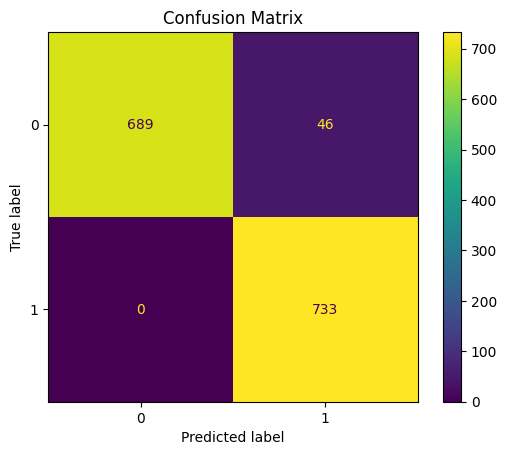

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = randomforest_model.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

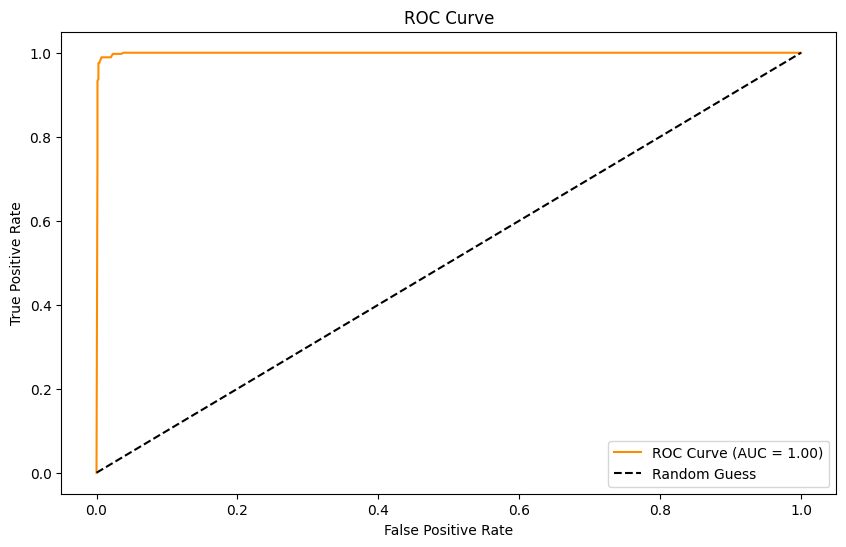

In [ ]:
y_proba = randomforest_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

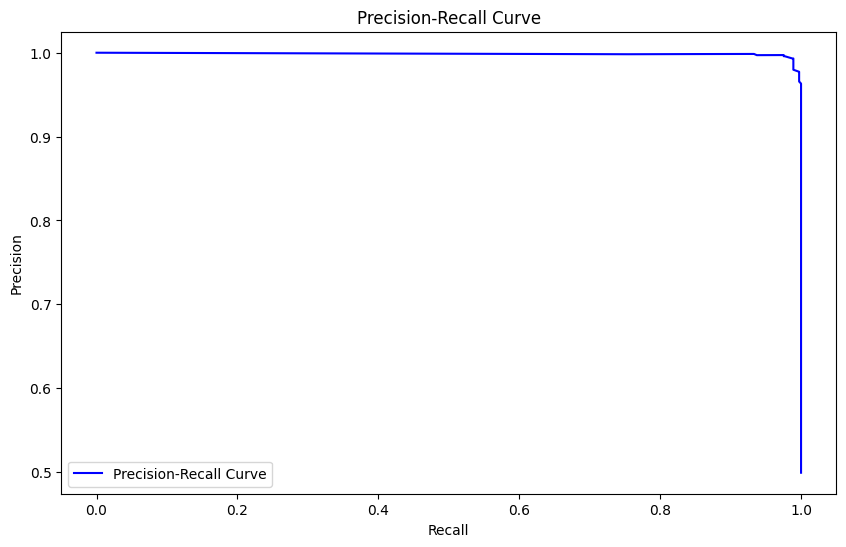

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

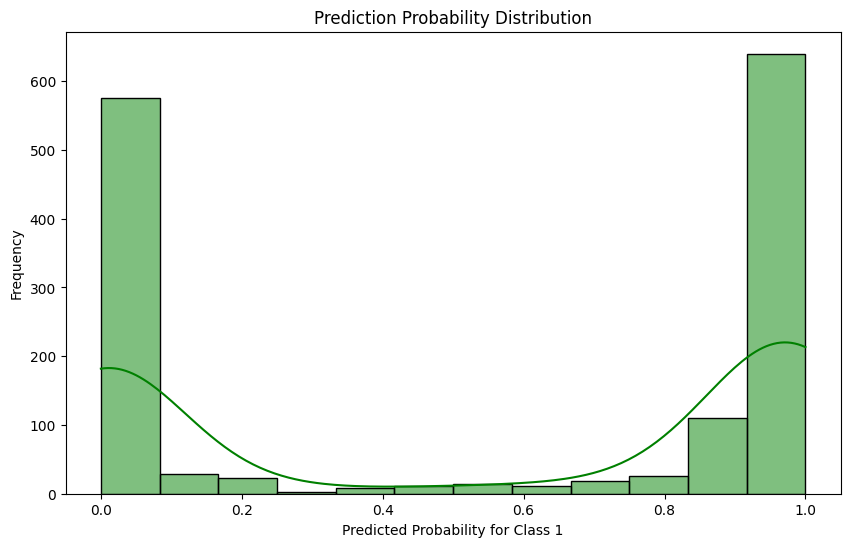

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_proba, kde=True, color='green')
plt.title('Prediction Probability Distribution')
plt.xlabel('Predicted Probability for Class 1')
plt.ylabel('Frequency')
plt.show()

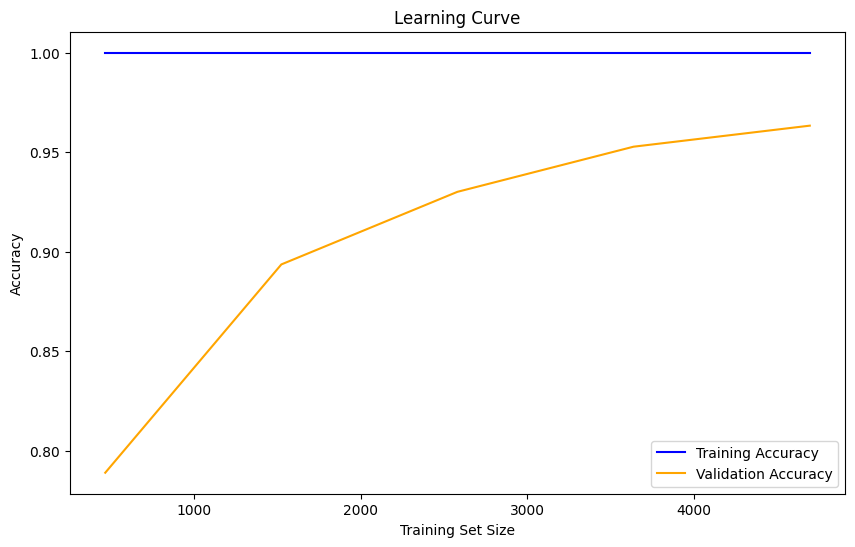

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator = randomforest_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Neural Network:
The Neural Network model, using MLPClassifier with a single hidden layer of size 100, ReLU activation, and the Adam optimizer, achieves an accuracy of 93.73%. The F1-scores are 0.93 for class 0 and 0.94 for class 1, showing moderate performance. The model performs well overall, though slightly lower than the Random Forest model, particularly in recall for class 0.

In [ ]:
neuralnetwork_model = MLPClassifier(hidden_layer_sizes=(100), activation='relu', solver='adam', max_iter=4000, random_state=42)
neuralnetwork_model.fit(X_train, y_train)

y_pred = neuralnetwork_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9373297002724795
              precision    recall  f1-score   support

           0       1.00      0.88      0.93       735
           1       0.89      1.00      0.94       733

    accuracy                           0.94      1468
   macro avg       0.94      0.94      0.94      1468
weighted avg       0.94      0.94      0.94      1468



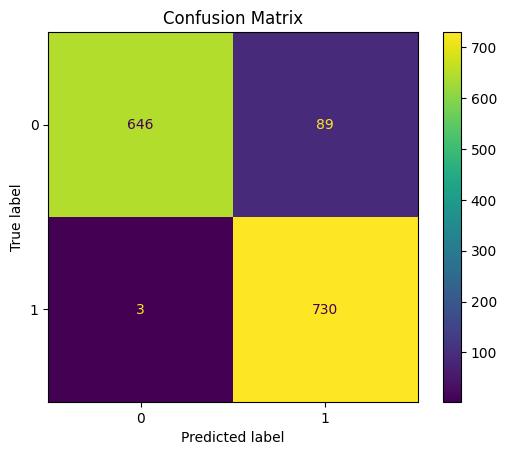

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = neuralnetwork_model.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

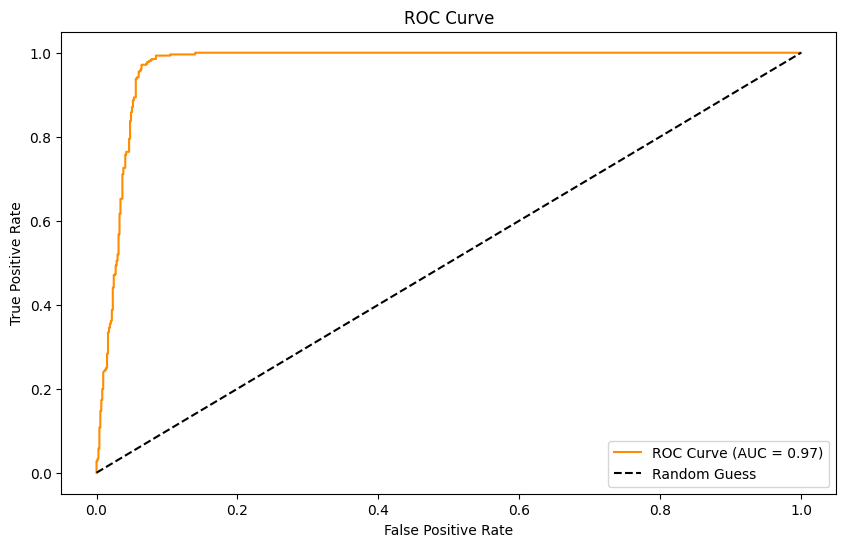

In [ ]:
y_proba = neuralnetwork_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

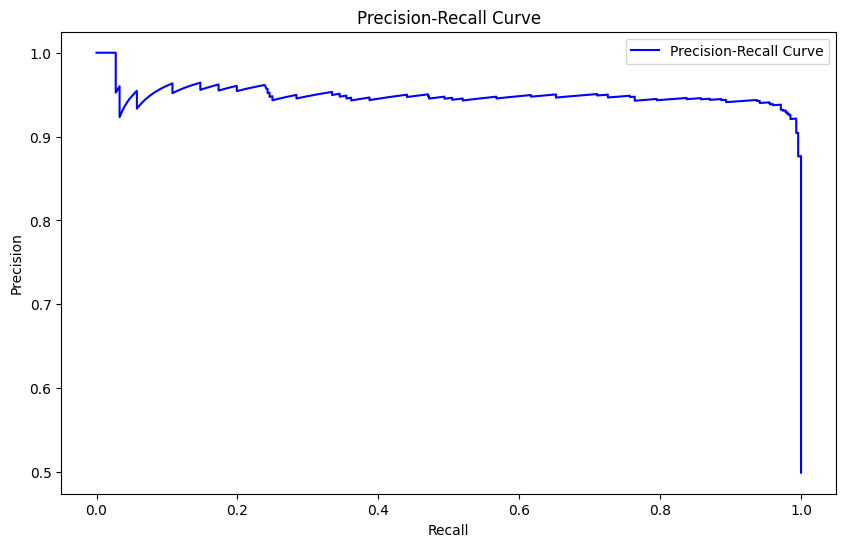

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

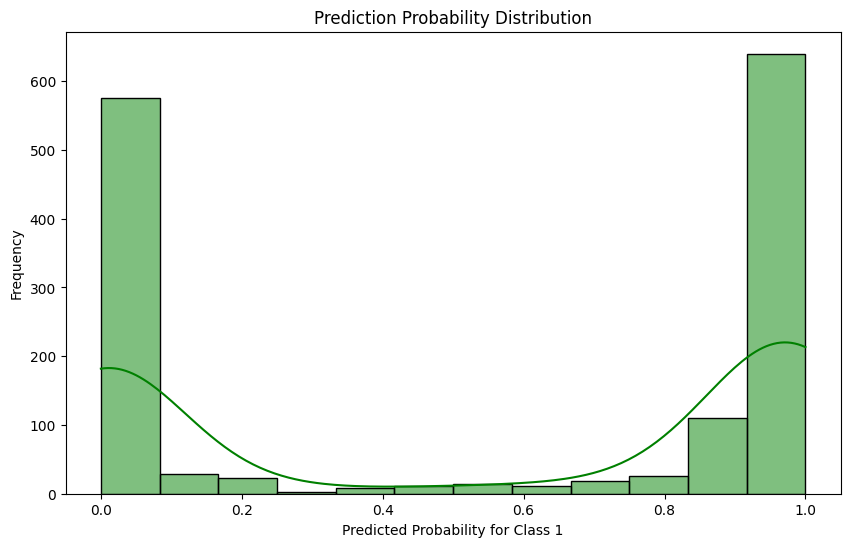

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_proba, kde=True, color='green')
plt.title('Prediction Probability Distribution')
plt.xlabel('Predicted Probability for Class 1')
plt.ylabel('Frequency')
plt.show()

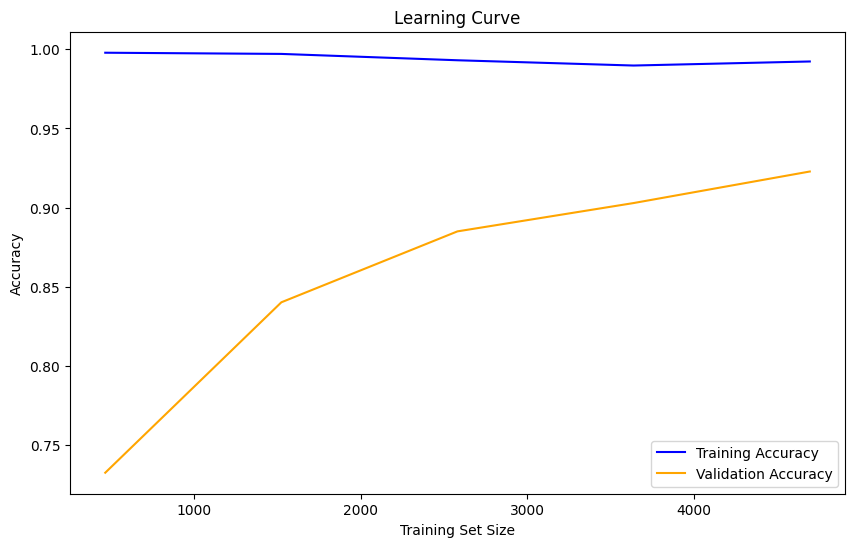

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator = neuralnetwork_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Gradient Boosting:
The Gradient Boosting model, with 100 estimators, a learning rate of 0.1, and a maximum depth of 5, achieves an accuracy of 87.39%. The F1-scores for class 0 and class 1 are 0.88 and 0.87, respectively, showing balanced performance. While precision and recall are reasonably high, the model underperforms compared to Random Forest and Neural Networks, suggesting that further hyperparameter tuning might improve its results.

In [ ]:
gradientboosting_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

gradientboosting_model.fit(X_train, y_train)

y_pred = gradientboosting_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8739782016348774
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       735
           1       0.89      0.85      0.87       733

    accuracy                           0.87      1468
   macro avg       0.87      0.87      0.87      1468
weighted avg       0.87      0.87      0.87      1468



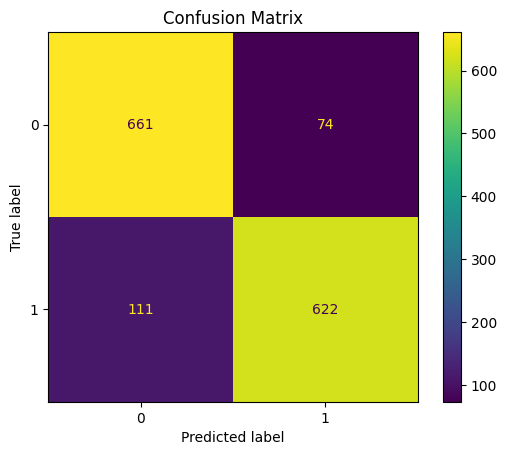

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = gradientboosting_model.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

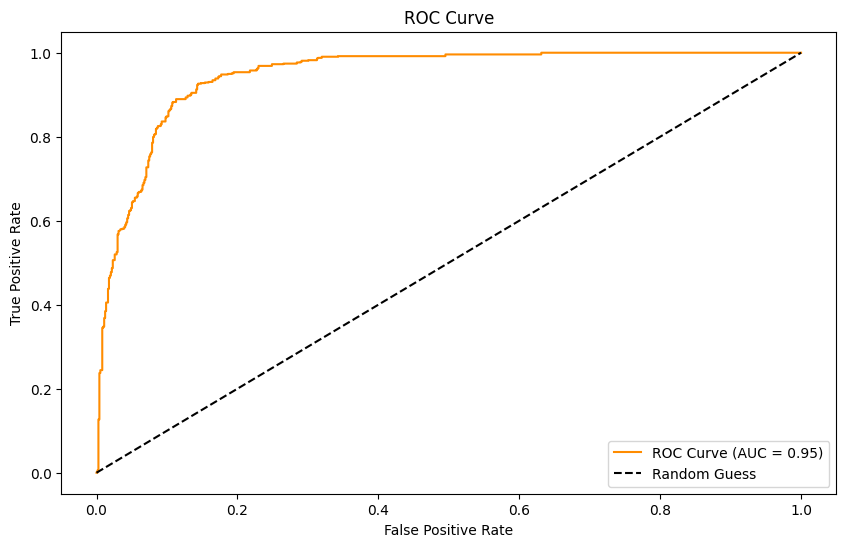

In [ ]:
y_proba = gradientboosting_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

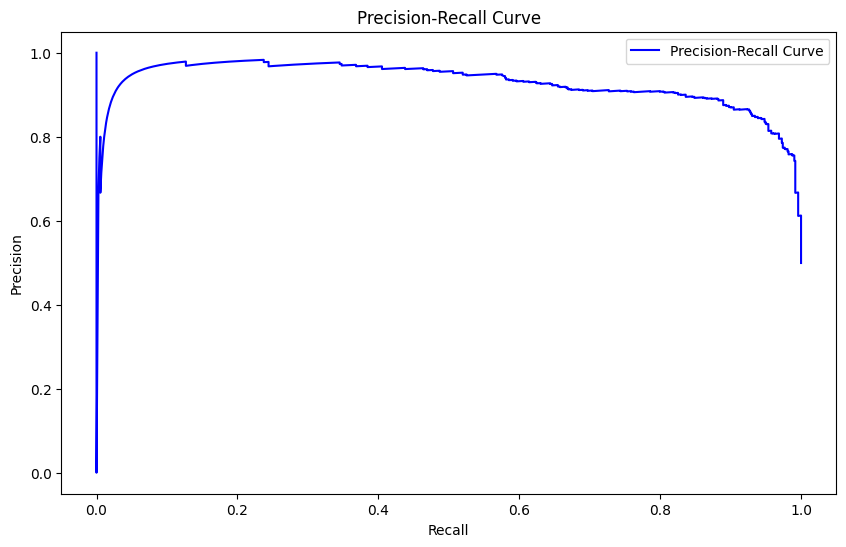

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

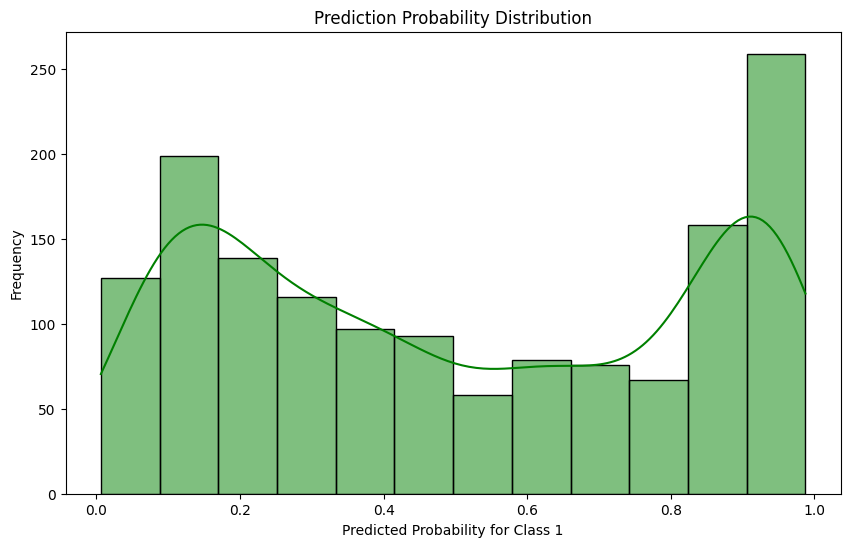

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_proba, kde=True, color='green')
plt.title('Prediction Probability Distribution')
plt.xlabel('Predicted Probability for Class 1')
plt.ylabel('Frequency')
plt.show()

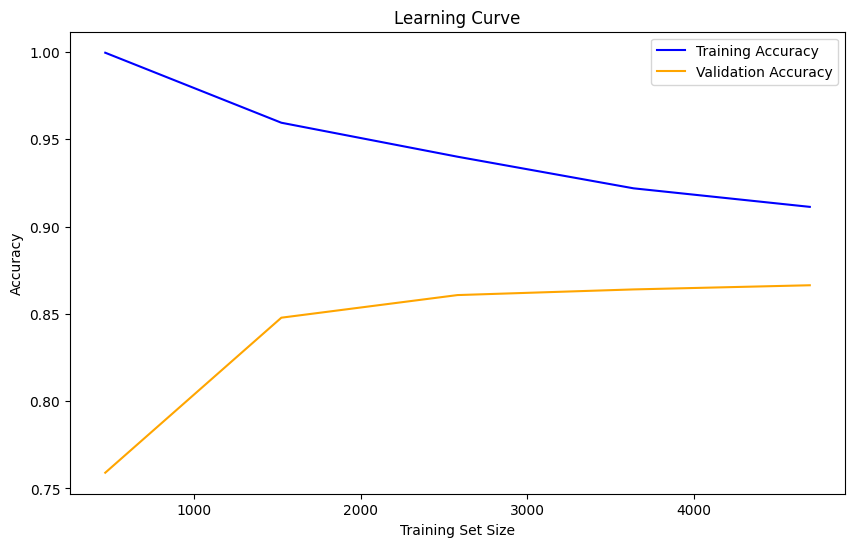

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator = gradientboosting_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Comparision of Trained Models:
We compared Logistic Regression, Random Forest, Neural Network, Gradient Boosting Models and selected the best working model, RandomForest Model.

In [ ]:
def get_model_scores(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': report['macro avg']['f1-score'],
        'F1 Score (No)': report['0']['f1-score'],
        'F1 Score (Yes)': report['1']['f1-score']
    }

models = [
    (regression_model, "Logistic Regression"),
    (randomforest_model, "Random Forest"),
    (neuralnetwork_model, "Neural Network"),
    (gradientboosting_model, "Gradient Boosting")
]

scores = []

for model, name in models:
    scores.append(get_model_scores(model, X_test, y_test, name))

scores_df = pd.DataFrame(scores)

scores_df

,Model,Accuracy,F1 Score,F1 Score (No),F1 Score (Yes)
0,Logistic Regression,0.715940,0.711456,0.747426,0.675486
1,Random Forest,0.968665,0.968637,0.967697,0.969577
2,Neural Network,0.937330,0.937124,0.933526,0.940722
3,Gradient Boosting,0.873978,0.873889,0.877240,0.870539


## Hyperparameter Tuning:
Hyperparameter tuning was applied to the Random Forest Model and improvement was achieved.
The best parameters of the model were printed.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', None]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## Training New Random Forest Model with Decided Hyperparametres:
The model was retrained using the best parameters obtained from hyperparameter tuning. As a result, an improvement was observed in the model. It achieves an accuracy of 97.20%. The F1-score for both class 0 and class 1 is 0.97, respectively.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model_updated = RandomForestClassifier(max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
randomforest_model_updated.fit(X_train, y_train)

y_pred = randomforest_model_updated.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9720708446866485
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       735
           1       0.95      1.00      0.97       733

    accuracy                           0.97      1468
   macro avg       0.97      0.97      0.97      1468
weighted avg       0.97      0.97      0.97      1468



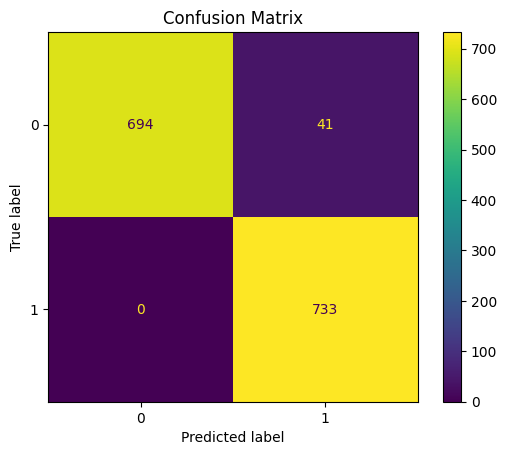

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = randomforest_model_updated.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

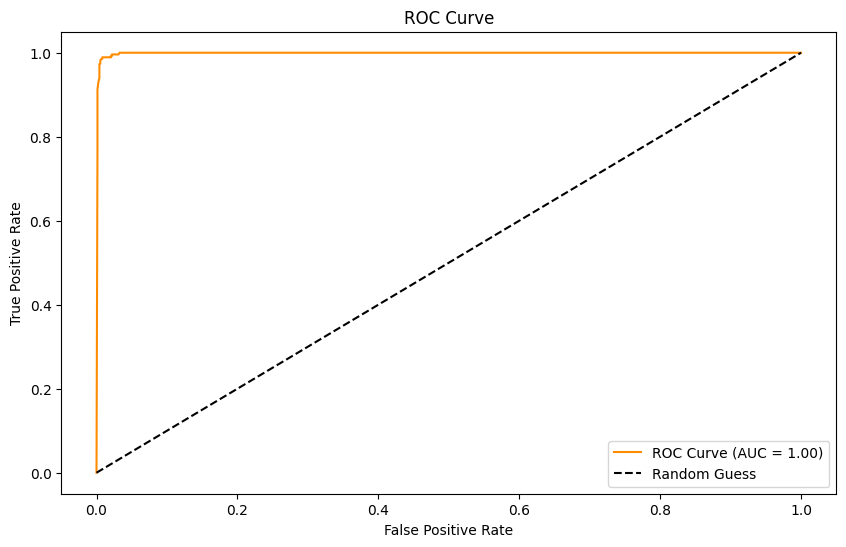

In [ ]:
y_proba = randomforest_model_updated.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

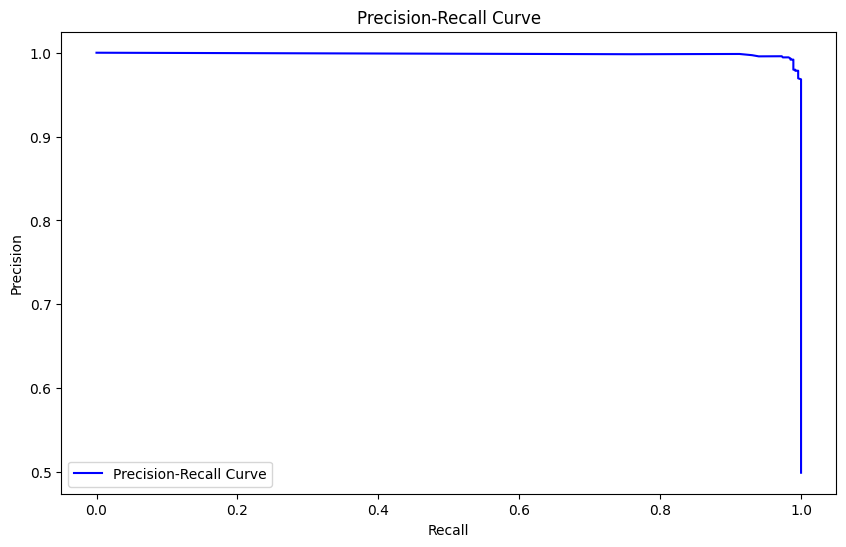

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

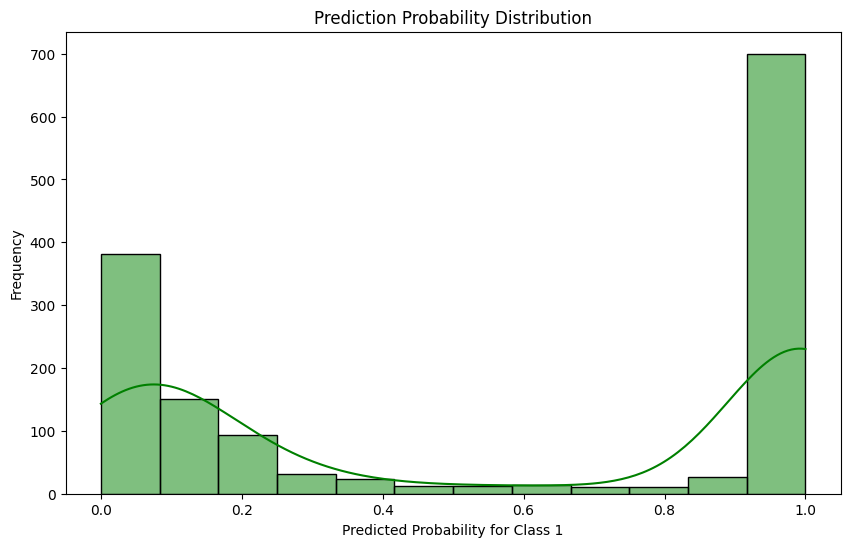

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_proba, kde=True, color='green')
plt.title('Prediction Probability Distribution')
plt.xlabel('Predicted Probability for Class 1')
plt.ylabel('Frequency')
plt.show()

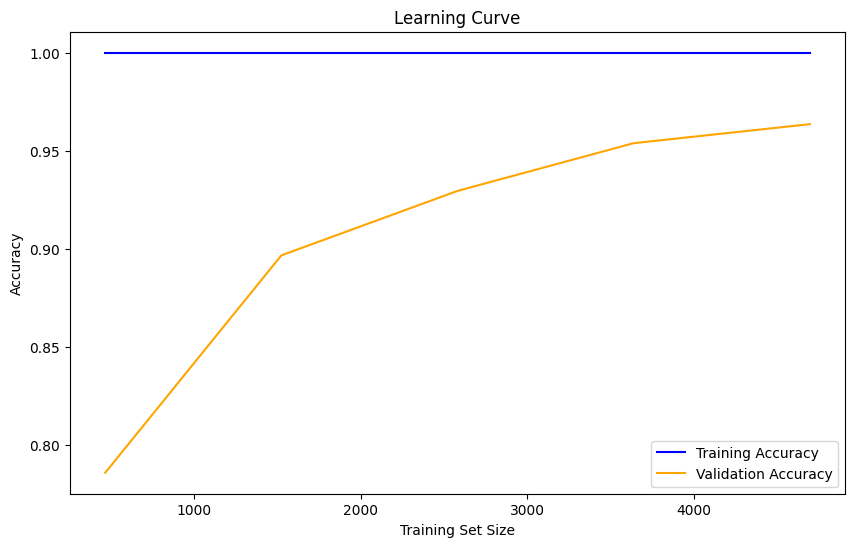

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator = randomforest_model_updated,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Pipeline:
This code builds a Random Forest Classifier pipeline with preprocessing and performs hyperparameter tuning using GridSearchCV. The pipeline includes one-hot encoding for categorical features and StandardScaler for numerical features via a ColumnTransformer. The Random Forest model, initialized with class_weight='balanced', is trained on stratified split data. GridSearchCV optimizes hyperparameters like n_estimators, max_depth, min_samples_split, and min_samples_leaf using 5-fold cross-validation. Finally, the best parameters are identified to maximize accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer([
    ('cat', Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_columns),

    ('num', StandardScaler(), make_column_selector(dtype_include='number'))

])

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('random_forest', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

param_grid = {
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_depth': [None, 10, 20],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'random_forest__max_depth': 20, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 200}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
randomforest_model_updated = RandomForestClassifier(max_depth = 20, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)
randomforest_model_updated.fit(X_train, y_train)

y_pred = randomforest_model_updated.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9809264305177112
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       734
           1       0.96      1.00      0.98       734

    accuracy                           0.98      1468
   macro avg       0.98      0.98      0.98      1468
weighted avg       0.98      0.98      0.98      1468



In [ ]:
import pandas as pd

# Veriler
accuracy = 0.9809264305177112
data = {
    "": ["0", "1", "accuracy", "macro avg", "weighted avg"],
    "precision": [1.00, 0.96, "", 0.98, 0.98],
    "recall": [0.96, 1.00, "", 0.98, 0.98],
    "f1-score": [0.98, 0.98,  0.98, 0.98, 0.98],
    "support": [734, 734, 1468, 1468, 1468],
}

# DataFrame oluştur
df = pd.DataFrame(data)

# Accuracy bilgisini tabloya ekleyin
print(f"Accuracy: {accuracy}\n")
df



Accuracy: 0.9809264305177112



,,precision,recall,f1-score,support
0,0,1.0,0.96,0.98,734
1,1,0.96,1.0,0.98,734
2,accuracy,,,0.98,1468
3,macro avg,0.98,0.98,0.98,1468
4,weighted avg,0.98,0.98,0.98,1468


After optimizing hyperparameters with GridSearchCV, the Random Forest model was retrained using the best parameters (max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200). The updated model achieved an impressive accuracy of 98.02% on the test set, with balanced F1-scores of 0.98 for both classes, demonstrating excellent overall performance.

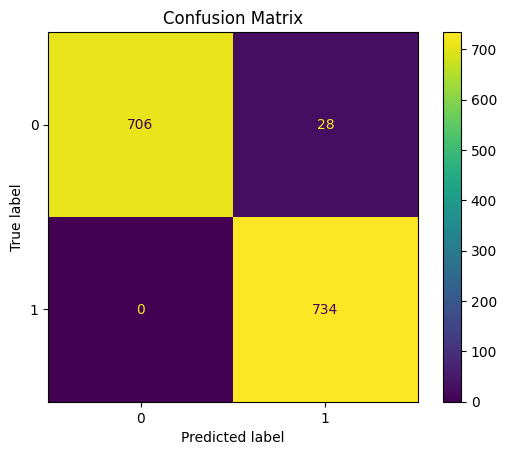

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = randomforest_model_updated.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

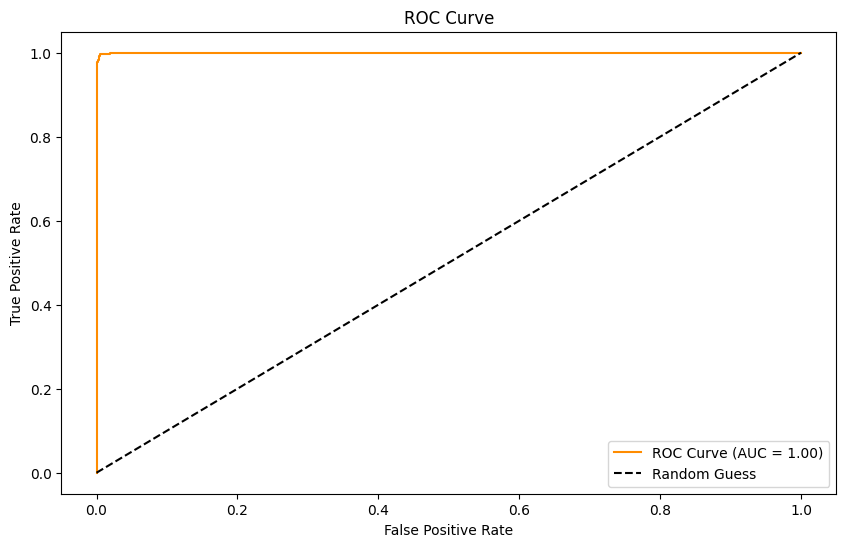

In [ ]:
y_proba = randomforest_model_updated.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

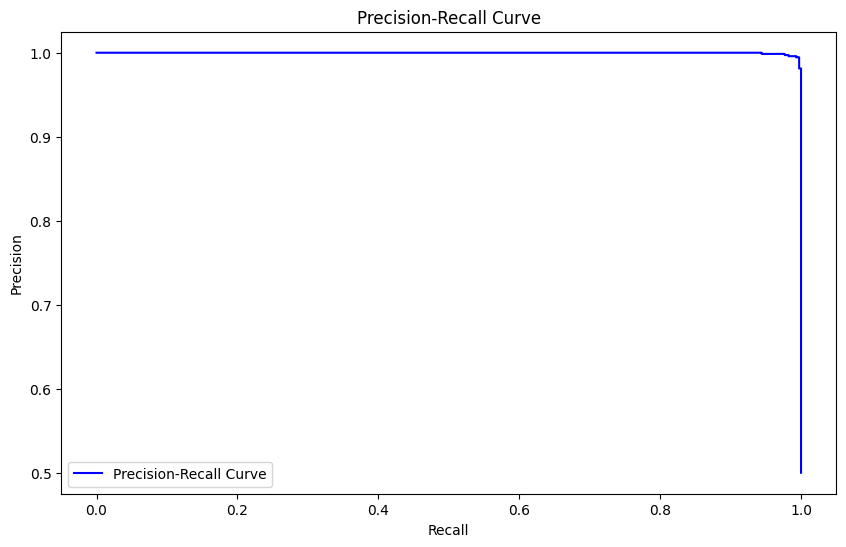

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

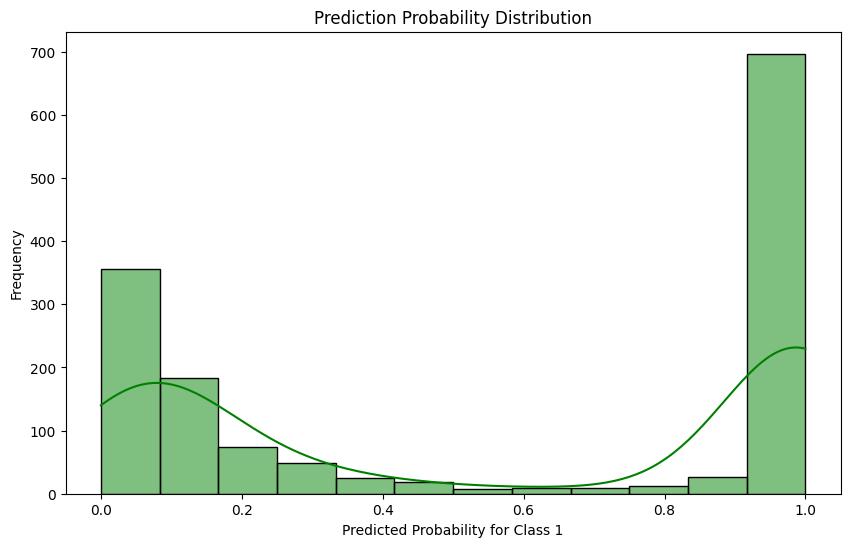

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_proba, kde=True, color='green')
plt.title('Prediction Probability Distribution')
plt.xlabel('Predicted Probability for Class 1')
plt.ylabel('Frequency')
plt.show()

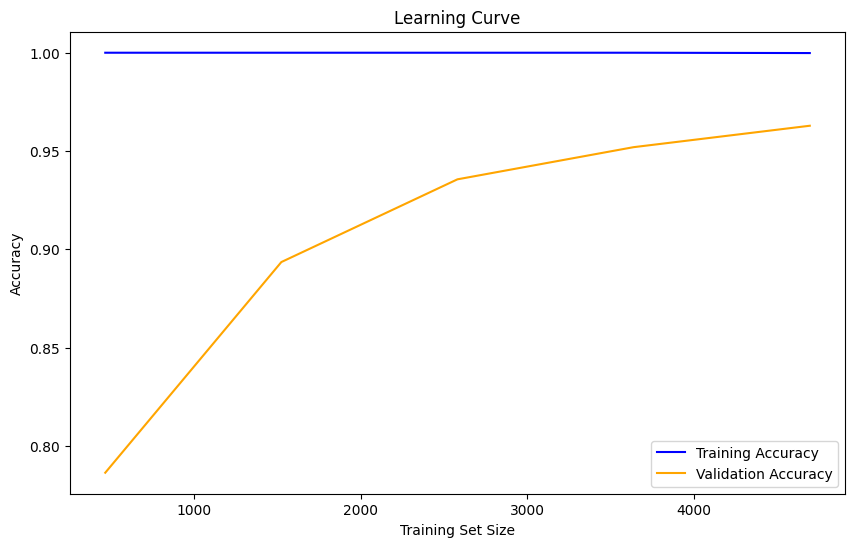

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator = randomforest_model_updated,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import joblib

drive.mount('/content/drive')
model_path = '/content/drive/My Drive/ada/BSA_model.pkl'
joblib.dump(randomforest_model_updated, model_path)
files.download('BSA_model.pkl')
print(f"Model saved to {model_path}")

In [ ]:
import os
print(os.path.exists('BSA_model.pkl'))

True


In [ ]:
current_dir = os.getcwd()
print("Current working directory:", current_dir)

file_name = 'BSA_model.pkl'
full_path = os.path.join(current_dir, file_name)
print("Full path to the file:", full_path)

Current working directory: /content
Full path to the file: /content/BSA_model.pkl


In [ ]:
model_info = {
    'model': randomforest_model_updated,
    'feature_names': X.columns.tolist()
}
joblib.dump(model_info, 'BSA_model.pkl')

NameError: name 'randomforest_model_updated' is not defined